# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=20_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus4'
perusresults='results/perus_results4'

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True
step 0.25

train...
phase 1
batch 9 learning rate 0.125 scaled 0.375




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule a


---------------------------------
| explained_variance | 0.862    |
| fps                | 2872     |
| nupdates           | 10       |
| policy_entropy     | 0.908    |
| policy_loss        | -4.6     |
| total_timesteps    | 196353   |
| value_loss         | 29.1     |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps                | 2807     |
| nupdates           | 20       |
| policy_entropy     | 0.947    |
| policy_loss        | 3.89     |
| total_timesteps    | 414523   |
| value_loss         | 17.9     |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 2785     |
| nupdates           | 30       |
| policy_entropy     | 0.922    |
| policy_loss        | 0.161    |
| total_timesteps    | 632693   |
| value_loss         | 0.827    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps        

---------------------------------
| explained_variance | 0.972    |
| fps                | 2785     |
| nupdates           | 280      |
| policy_entropy     | 0.96     |
| policy_loss        | 0.0243   |
| total_timesteps    | 6086943  |
| value_loss         | 0.353    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2786     |
| nupdates           | 290      |
| policy_entropy     | 0.939    |
| policy_loss        | 0.0104   |
| total_timesteps    | 6305113  |
| value_loss         | 0.28     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2787     |
| nupdates           | 300      |
| policy_entropy     | 0.934    |
| policy_loss        | -0.0304  |
| total_timesteps    | 6523283  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2792     |
| nupdates           | 550      |
| policy_entropy     | 0.963    |
| policy_loss        | -0.0352  |
| total_timesteps    | 11977533 |
| value_loss         | 0.321    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2792     |
| nupdates           | 560      |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0446  |
| total_timesteps    | 12195703 |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2792     |
| nupdates           | 570      |
| policy_entropy     | 0.934    |
| policy_loss        | -0.0179  |
| total_timesteps    | 12413873 |
| value_loss         | 0.327    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2796     |
| nupdates           | 820      |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0622  |
| total_timesteps    | 17868123 |
| value_loss         | 0.403    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2796     |
| nupdates           | 830      |
| policy_entropy     | 0.952    |
| policy_loss        | 0.0458   |
| total_timesteps    | 18086293 |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2796     |
| nupdates           | 840      |
| policy_entropy     | 0.938    |
| policy_loss        | 0.026    |
| total_timesteps    | 18304463 |
| value_loss         | 0.259    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

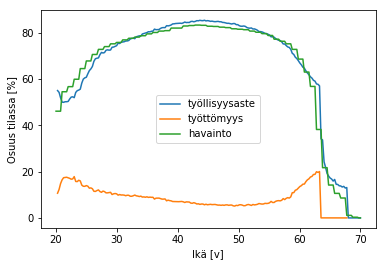

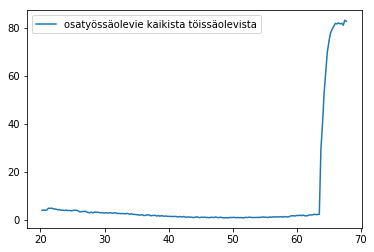

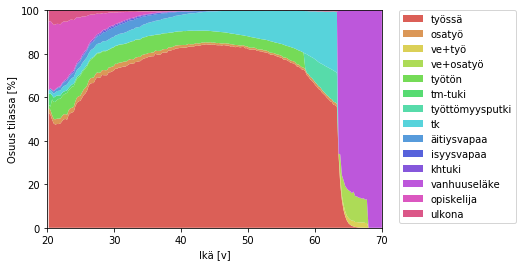

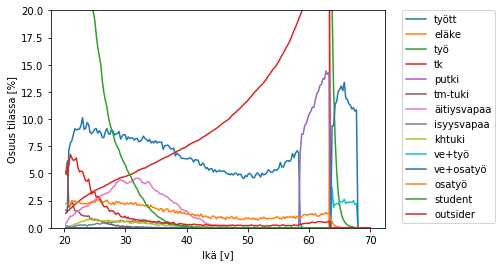

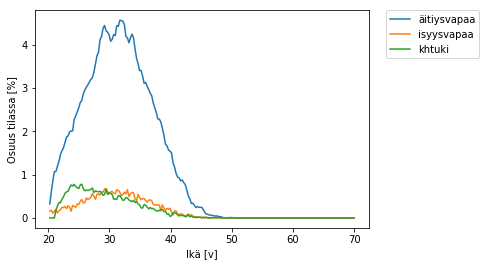

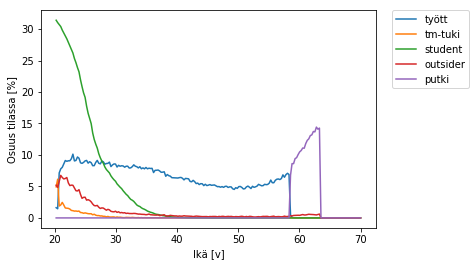

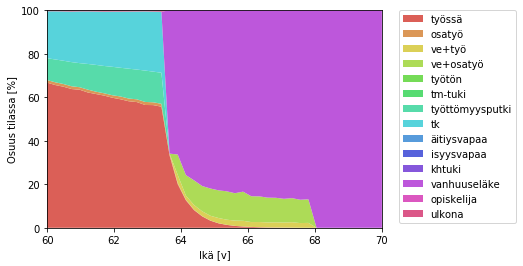

keskimääräine työttömyysaste 8.984684840243018


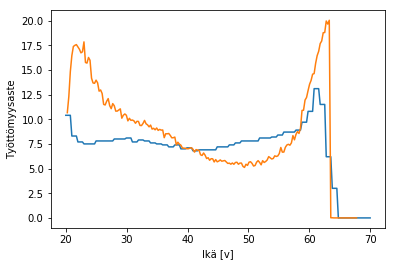

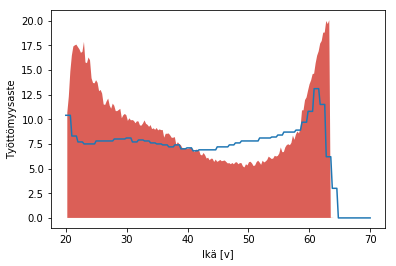

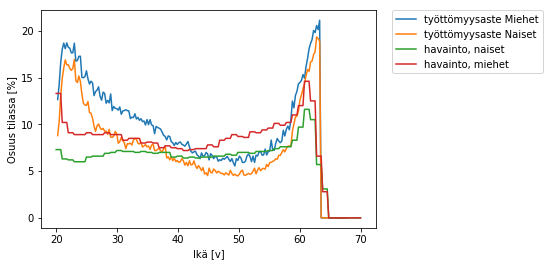

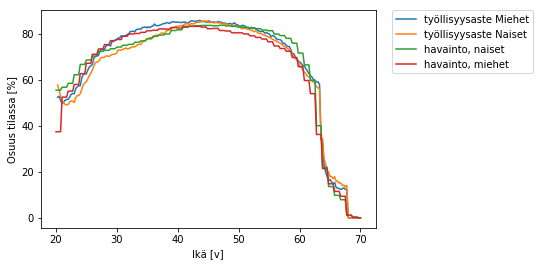

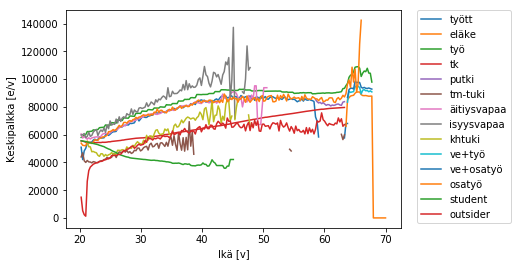

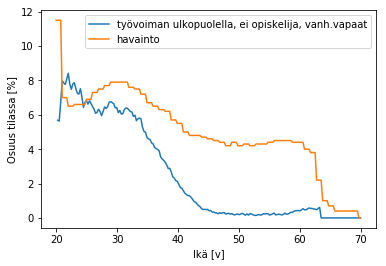

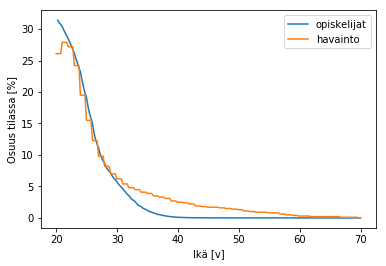

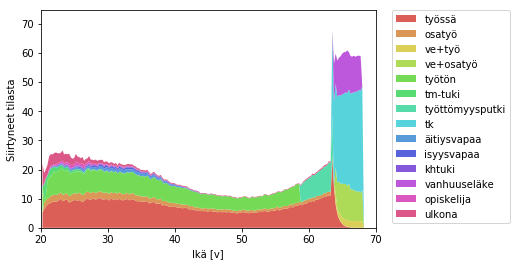

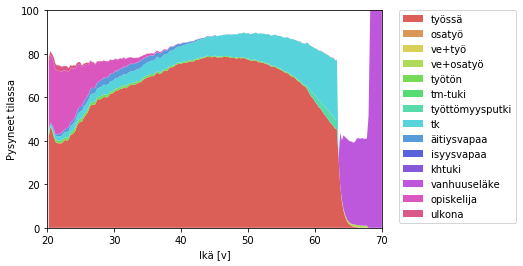

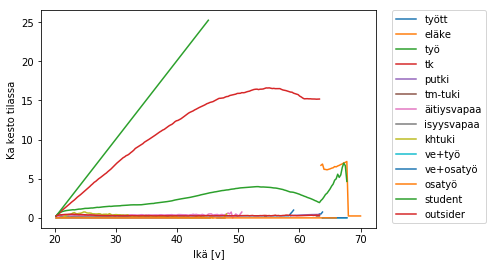

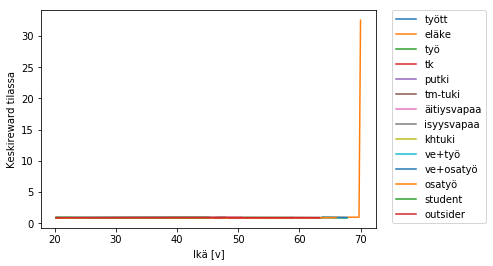

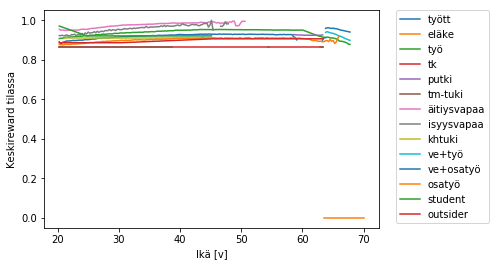

No handles with labels found to put in legend.


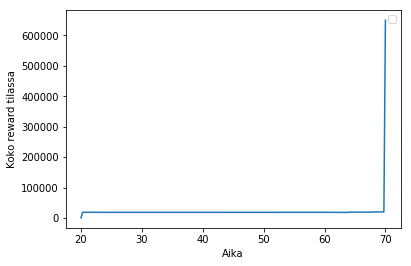

Yhteensä reward 219.66325191284372


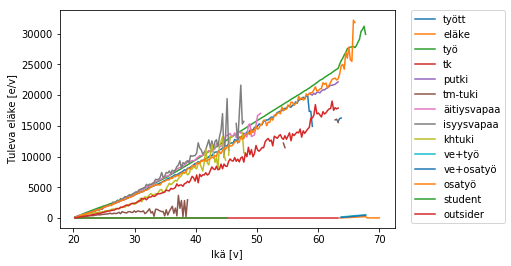

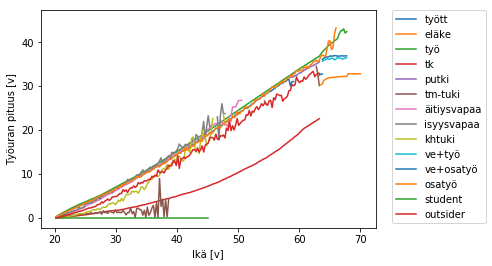

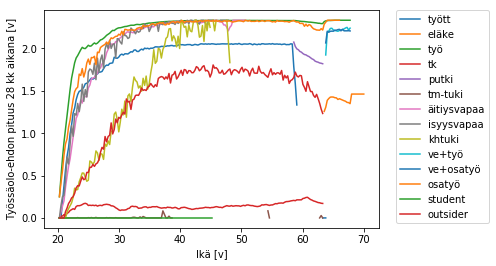

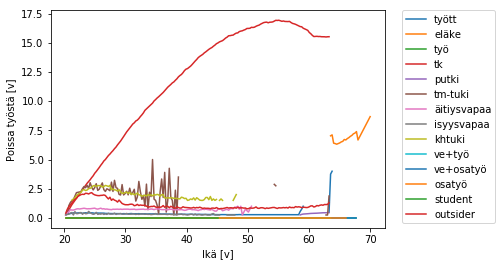

In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

In [ ]:
cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1b.render(load=perusresults)

# Deep Q-network

Kokeillaan toista menetelmää ratkaisuun. Muutos on helppo tehdä, muutetaan vain algoritmin valintaa säätelevän parametrin _rlmodel_ arvo, ja varmistetaan että kaikki lähtee alusta liikkeelle (_cont=False_). Deep Q-network on menetelmänä hitaampi kuin ACKTR, joten tässä aika-askelten määrä on rajattu 1 000 000:aan. Jos halutaan konvergenssia, tarvitaan kuitenkin enemmän askelia.

In [ ]:
cc1q=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1q.explain()
cc1q.run_results(debug=False,steps1=1_000_000,steps2=size2,pop=1_000,deterministic=deterministic,
                train=True,predict=True,batch1=1,batch2=batch2,
                save=perusmalli+'_dqn',plot=True,cont=False,start_from=perusmalli+'_dqn',results=perusresults+'_dqn',
                callback_minsteps=callback_minsteps,rlmodel='dqn',twostage=False)